In [48]:
from nilearn import datasets, plotting, regions
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.io as sio
from nilearn.image import index_img
import mvlearn
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv("/Users/emafikre/Desktop/DemographicData/participants.tsv", sep = '\t')

Text(0, 0.5, 'Count')

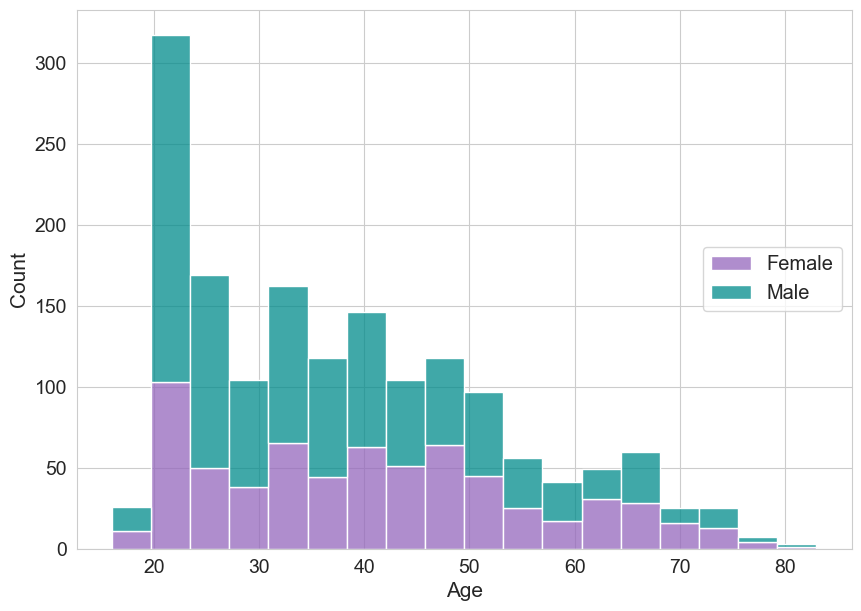

In [50]:
import seaborn as sns
sns.set_style("whitegrid")
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
sns.histplot(data = df,
             x = 'age', ax=ax, hue= 'sex', palette=["darkcyan", 'tab:purple'],multiple='stack',legend=False)
new_labels = ['Female', 'Male']
plt.legend(labels=new_labels, loc = 'right', fontsize = 'x-large')

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# This graph showcases that this data is lacking in female statistical representation in comparison to male.
# There is not a 50/50 ratio as seen within nature. Not only that, but our data is comprised largly of younger participants with very few at older ages.

<AxesSubplot:xlabel='age', ylabel='Count'>

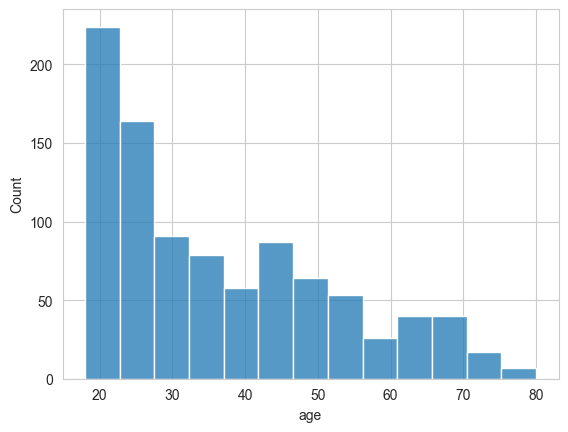

In [51]:
sns.histplot( data= df.loc[df['diag'] == 0], x="age")
# Healthy Age Distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

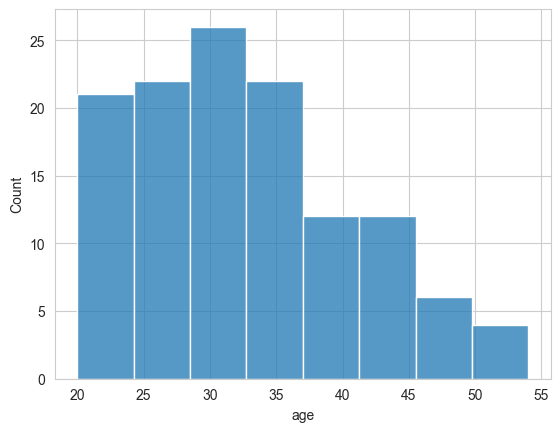

In [52]:
sns.histplot( data= df.loc[df['diag'] == 1], x="age")
# Autism Spectrum Disorder Age Distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

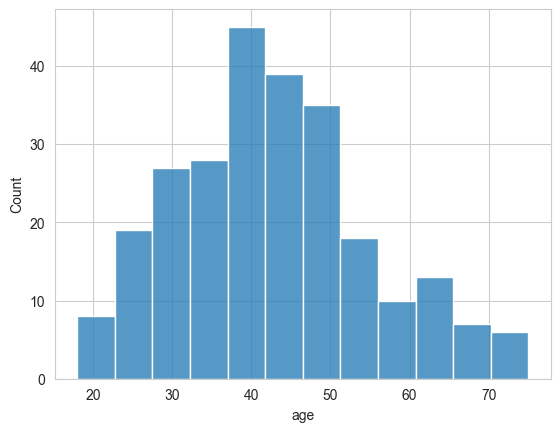

In [53]:
sns.histplot( data= df.loc[df['diag'] == 2], x="age")
# Major Depressive Disorder Age Distrtibution

<AxesSubplot:xlabel='age', ylabel='Count'>

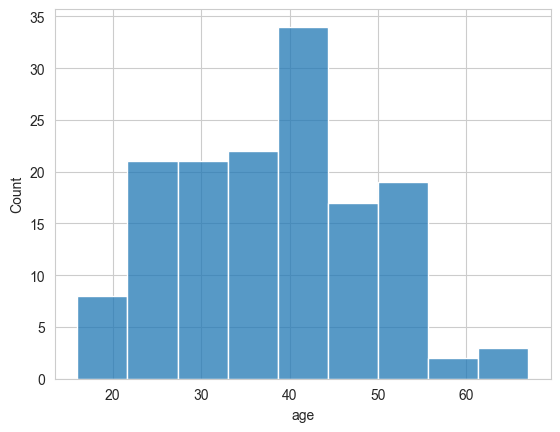

In [54]:
sns.histplot( data= df.loc[df['diag'] == 4], x="age")
# Schizophrenia Age Distribution


<AxesSubplot:xlabel='age', ylabel='Count'>

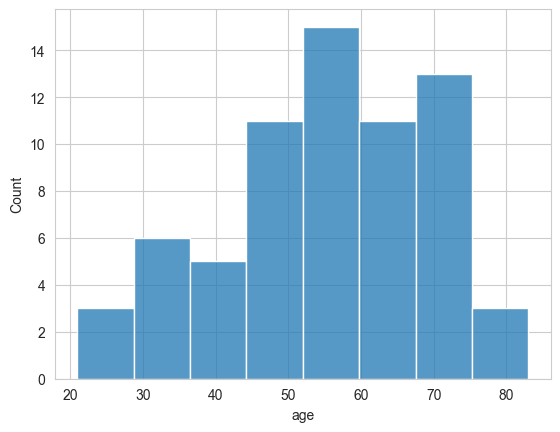

In [55]:
sns.histplot( data= df.loc[df['diag'] == 5], x="age")
# Pain Age Distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

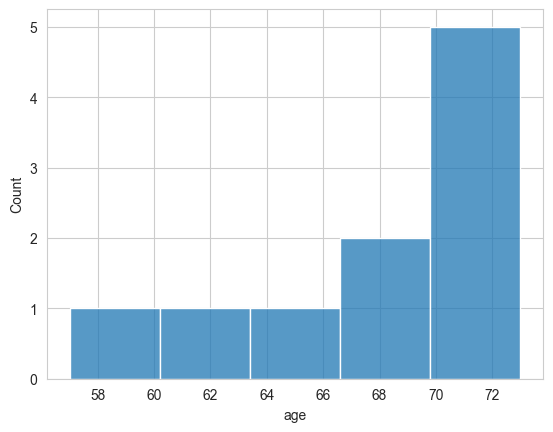

In [56]:
sns.histplot( data= df.loc[df['diag'] == 6], x="age")
# Stroke age distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

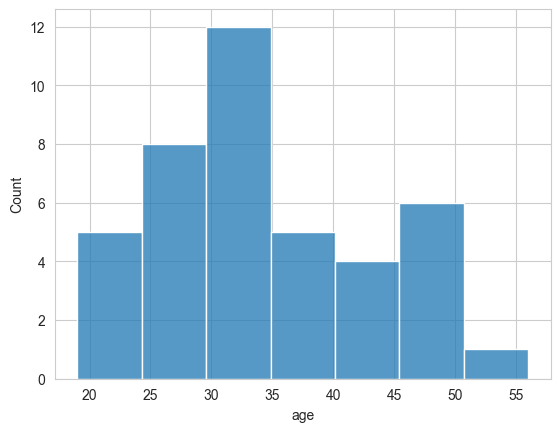

In [57]:
sns.histplot( data= df.loc[df['diag'] == 7], x="age")
# Bipolar Age Distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

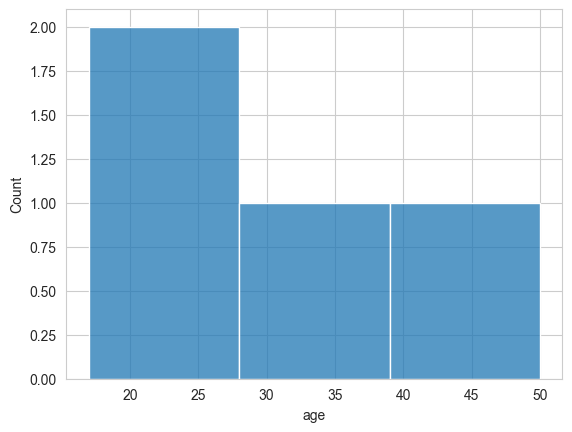

In [58]:
sns.histplot( data= df.loc[df['diag'] == 8], x="age")
#Dsythmia age distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

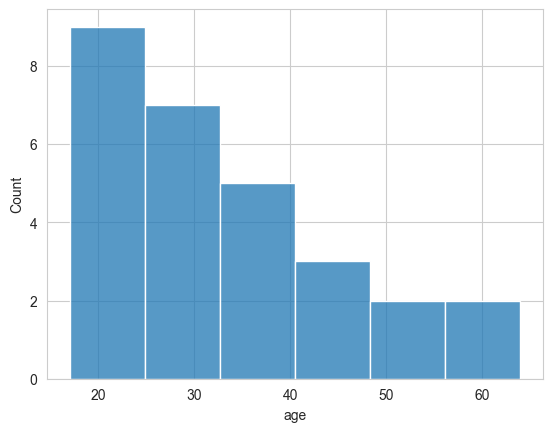

In [59]:
sns.histplot( data= df.loc[df['diag'] == 9], x="age")
#Others age distribution

Text(0, 0.5, 'Count')

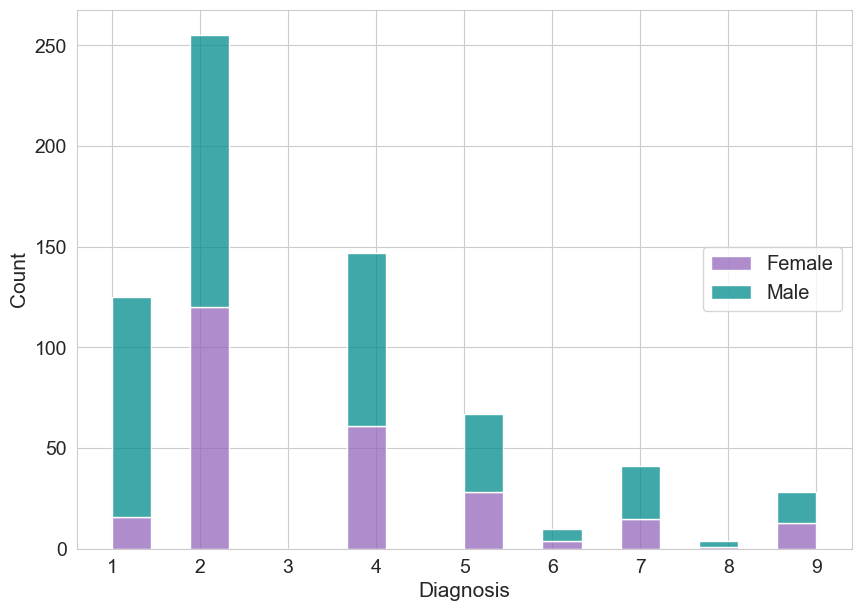

In [60]:
df.drop(df[df['diag'] == 0].index, inplace = True)

import seaborn as sns
sns.set_style("whitegrid")
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
sns.histplot(data = df,
             x = 'diag', ax=ax, hue= 'sex', palette=["darkcyan", 'tab:purple'],multiple='stack',legend=False)
new_labels = ['Female', 'Male']
plt.legend(labels=new_labels, loc = 'right', fontsize = 'x-large')

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Diagnosis', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0, 0.5, 'Count')

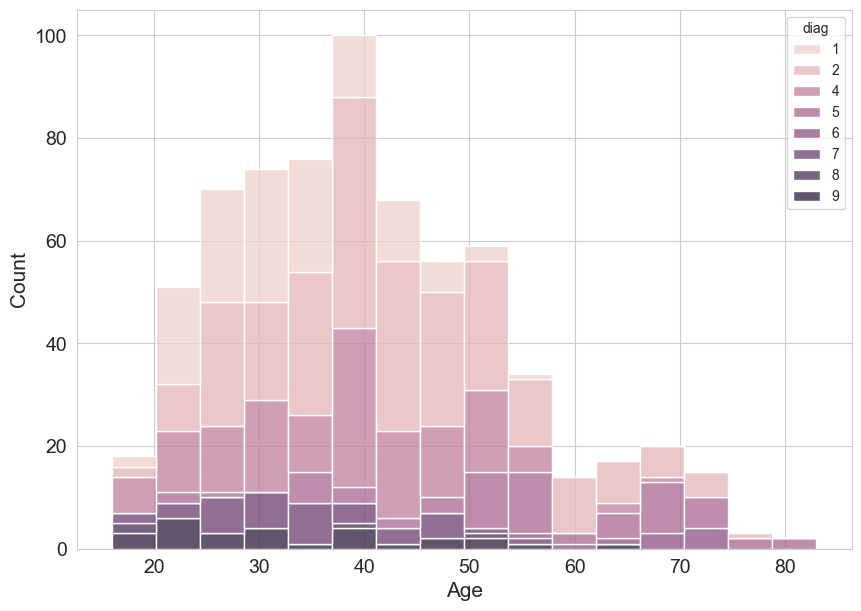

In [61]:
import seaborn as sns
sns.set_style("whitegrid")
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
sns.histplot(data = df,
             x = 'age', ax=ax, hue= 'diag', multiple='stack', legend = True)

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

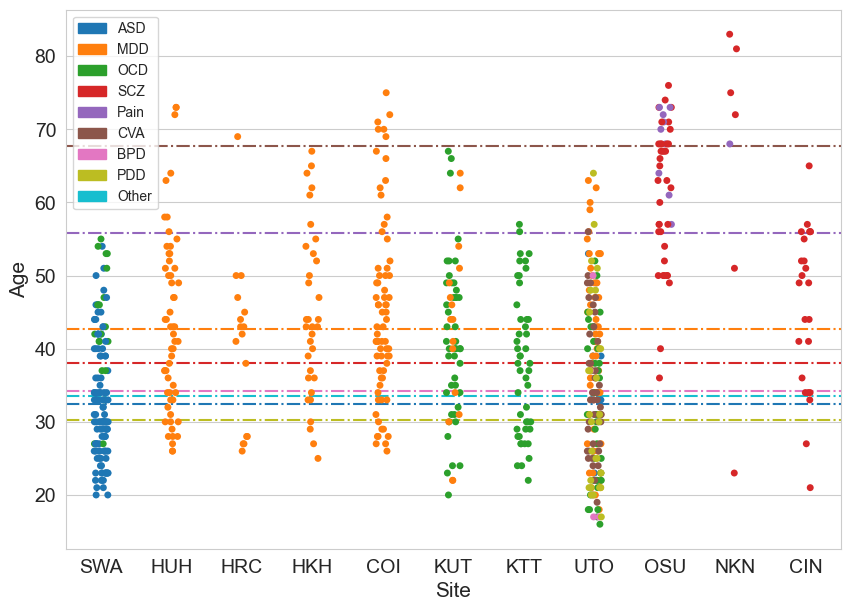

In [63]:
age_mean_1 = df.loc[(df['diag'] == 1)]['age'].mean()
age_mean_2 = df.loc[(df['diag'] == 2)]['age'].mean()
age_mean_3 = df.loc[(df['diag'] == 3)]['age'].mean()
age_mean_4 = df.loc[(df['diag'] == 4)]['age'].mean()
age_mean_5 = df.loc[(df['diag'] == 5)]['age'].mean()
age_mean_6 = df.loc[(df['diag'] == 6)]['age'].mean()
age_mean_7 = df.loc[(df['diag'] == 7)]['age'].mean()
age_mean_8 = df.loc[(df['diag'] == 8)]['age'].mean()
age_mean_9 = df.loc[(df['diag'] == 9)]['age'].mean()

sns.set_style("whitegrid")
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
sns.stripplot(data = df,
             x = 'site', y = 'age', ax=ax, hue = "diag", palette=["tab:blue", 'tab:orange', 
            "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:olive", "tab:cyan"])

diag_1 = mpatches.Patch(color='tab:blue', label='ASD')
diag_2 = mpatches.Patch(color='tab:orange', label='MDD')
diag_3 = mpatches.Patch(color='tab:green', label='OCD')
diag_4 = mpatches.Patch(color='tab:red', label='SCZ')
diag_5 = mpatches.Patch(color='tab:purple', label='Pain')
diag_6 = mpatches.Patch(color='tab:brown', label='CVA')
diag_7 = mpatches.Patch(color='tab:pink', label='BPD')
diag_8 = mpatches.Patch(color='tab:olive', label='PDD')
diag_9 = mpatches.Patch(color='tab:cyan', label='Other')

plt.legend(handles=[diag_1,diag_2,diag_3,diag_4,diag_5,diag_6,diag_7,diag_8,diag_9])

ax.axhline(y = age_mean_1, c="tab:blue", linestyle = '-.')
ax.axhline(y = age_mean_2, c="tab:orange", linestyle = '-.')
ax.axhline(y = age_mean_3, c="tab:green", linestyle = '-.')
ax.axhline(y = age_mean_4, c="tab:red", linestyle = '-.')
ax.axhline(y = age_mean_5, c="tab:purple", linestyle = '-.')
ax.axhline(y = age_mean_6, c="tab:brown", linestyle = '-.')
ax.axhline(y = age_mean_7, c="tab:pink", linestyle = '-.')
ax.axhline(y = age_mean_8, c="tab:olive", linestyle = '-.')
ax.axhline(y = age_mean_9, c="tab:cyan", linestyle = '-.')

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Site', fontsize = 15)
plt.ylabel('Age', fontsize = 15);